In [42]:
## Imports and defining constants for easier coding
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import pymc3 as pm
from scipy import special as ss
from scipy.stats import beta, binom
e = np.e

# 9.1

A)

In [43]:
## defined the auxilary fucntions mentioned in the text, used formulas from the text

def gammaSRfromMeanSD(mean, sd):
    
    s = (mean ** 2)/(sd ** 2)
    r = mean / (sd ** 2)
    return s, r
    
def gammaSRfromModeSD(mode, sd):
    
    r = (mode + np.sqrt((mode ** 2) + 4 * (sd ** 2))) / (2 * (sd ** 2))
    s = 1 + (mode * r)
    return s, r

In [44]:
## defined the gamma function using shape and rate as parameters
def gamma(shape, rate, x):
    return ((rate ** shape)/ss.gamma(shape))*(x**(shape - 1) * e**(-rate * x))

B)

In [12]:
x = np.linspace(0, 200, 1000)

In [45]:
## Setting the output of the auxilary functions and the gamma functions to variables
s1, r1 = gammaSRfromMeanSD(1, 10)
s2, r2 = gammaSRfromModeSD(1, 10)
meanGamma = gamma(s1, r1, x)
modeGamma = gamma(s2, r2, x)

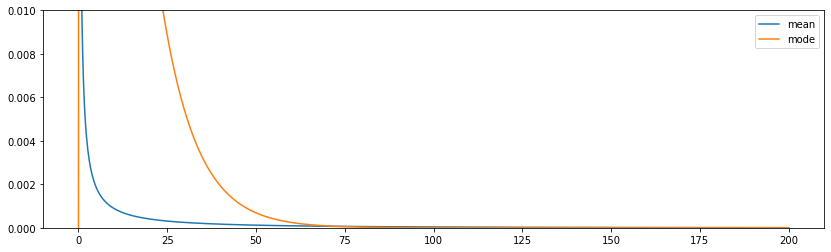

In [14]:
## Plotting the two different gamma distributions
plt.figure(figsize = (14, 4))
plt.plot(x, meanGamma);
plt.plot(x, modeGamma);
plt.legend(('mean', 'mode'));
plt.ylim(0, .01);

C)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa, mu]
Sampling chain 1, 12 divergences: 100%|██████████| 1500/1500 [00:10<00:00, 146.19it/s]
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/opt/conda/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


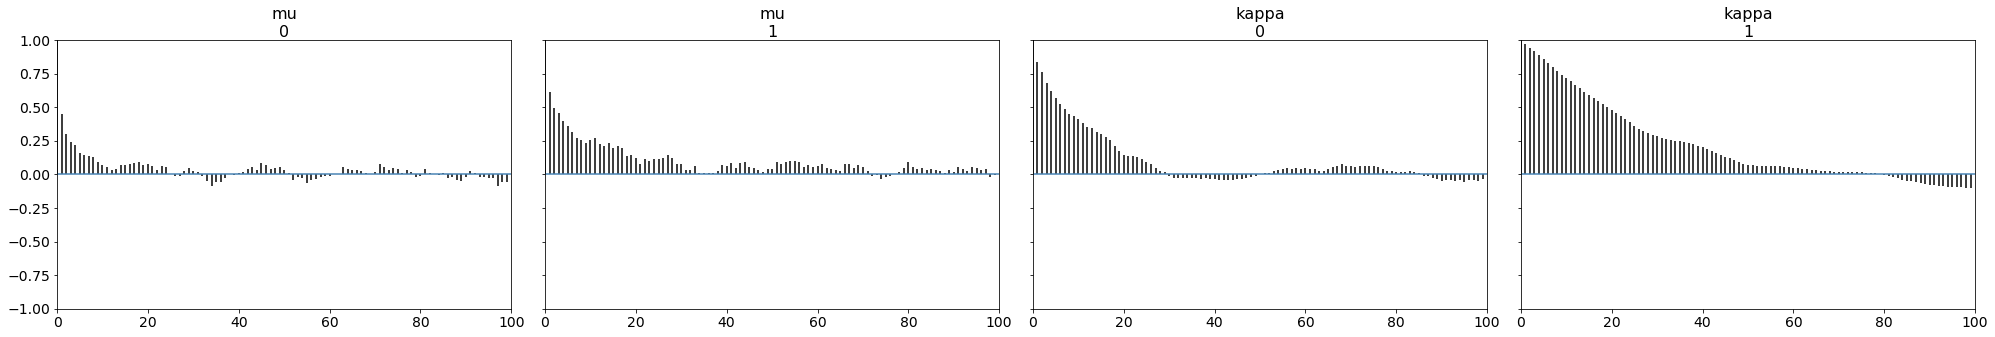

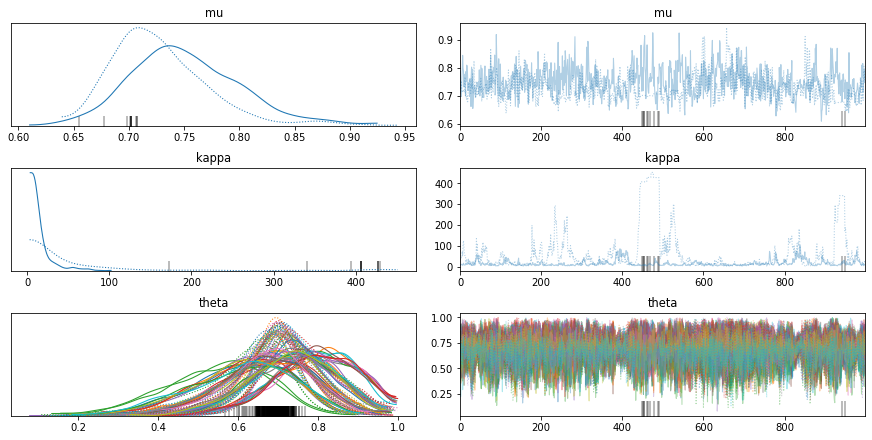

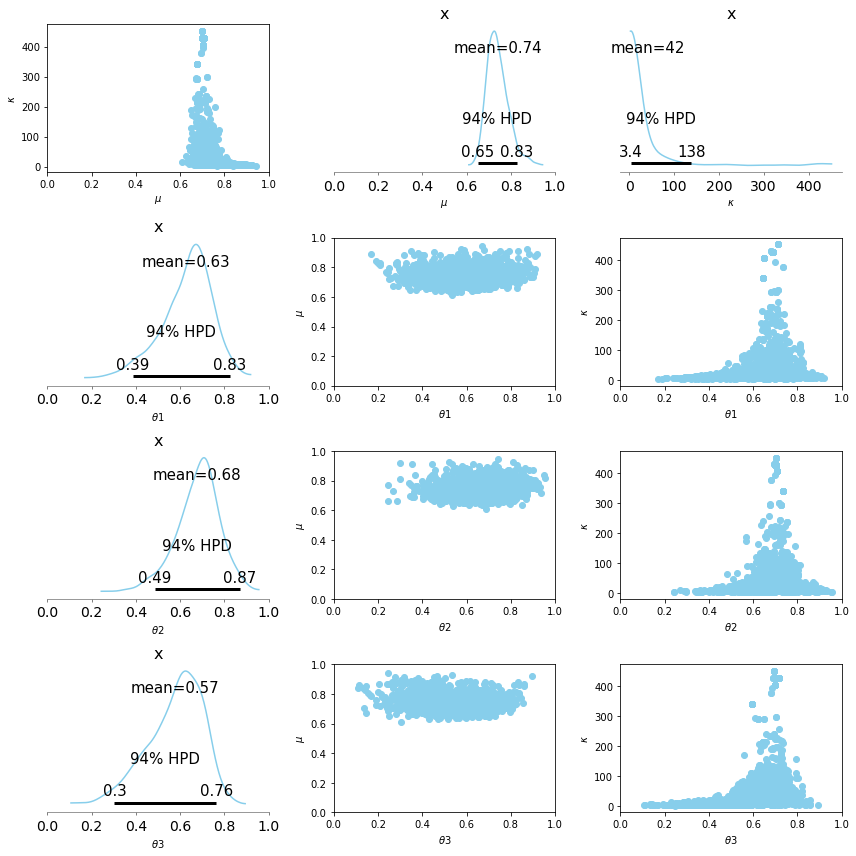

In [39]:
# Data for figure 9.11
#N =  [10, 10, 10]  # Number of flips per coin
#z =  [5, 5, 5]  # Number of heads per coin
## Data for figure 9.12
#N =  [10, 10, 10]  # Number of flips per coin
#z =  [1, 5, 9]  # Number of heads per coin

## Data for exercise 9.1
ncoins = 50
nflipspercoin = 5
mu_act = .7
kappa_act = 20
theta_act = beta.rvs(mu_act*kappa_act+1, (1-mu_act)*kappa_act+1, size=ncoins)
z = binom.rvs(n=nflipspercoin, p=theta_act, size=ncoins)
N = [nflipspercoin] * ncoins


# Arrange the data into a more convenient way to feed the PyMC model.
coin = []  # list/vector index for each coins (from 0 to number of coins)
y = []  # list/vector with head (1) or tails (0) for each flip.
for i, flips in enumerate(N):
    heads = z[i]
    if  heads > flips:
        sys.exit("The number of heads can't be greater than the number of flips")
    else:
        y = y + [1] * heads + [0] * (flips-heads)
        coin = coin + [i] * flips


# Specify the model in PyMC
with pm.Model() as model:
# define the hyperparameters
    mu = pm.Beta('mu', 2, 2)
    kappa = pm.Gamma('kappa', alpha = s1, beta = r1)
    # define the prior
    theta = pm.Beta('theta', mu * (kappa - 2) + 1, (1 - mu) * (kappa - 2) + 1, shape=len(N))
    # define the likelihood
    y = pm.Bernoulli('y', p=theta[coin], observed=y)

#   Generate a MCMC chain

    trace = pm.sample(1000)


## Check the results.

## Print summary for each trace
#pm.df_summary(trace)
#pm.df_summary(trace)

## Check for mixing and autocorrelation
pm.autocorrplot(trace, varnames=['mu', 'kappa'])
#pm.autocorrplot(trace, varnames =[mu, kappa])

## Plot KDE and sampled values for each parameter.
pm.traceplot(trace)
#pm.traceplot(trace)

# Create arrays with the posterior sample
theta1_sample = trace['theta'][:,0]
theta2_sample = trace['theta'][:,1]
theta3_sample = trace['theta'][:,2]
mu_sample = trace['mu']
kappa_sample = trace['kappa']


# Scatter plot hyper-parameters
fig, ax = plt.subplots(4, 3, figsize=(12,12))
ax[0, 0].scatter(mu_sample, kappa_sample, marker='o', color='skyblue')
ax[0, 0].set_xlim(0,1)
ax[0, 0].set_xlabel(r'$\mu$')
ax[0, 0].set_ylabel(r'$\kappa$')

# Plot mu histogram
#plot_post(mu_sample, xlab=r'$\mu$', show_mode=False, labelsize=9, framealpha=0.5)

pm.plot_posterior(mu_sample, ax=ax[0, 1], color='skyblue')
ax[0, 1].set_xlabel(r'$\mu$')
ax[0, 1].set_xlim(0,1)

# Plot kappa histogram
#plot_post(kappa_sample, xlab=r'$\kappa$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(kappa_sample, ax=ax[0, 2], color='skyblue')
ax[0, 2].set_xlabel(r'$\kappa$')

# Plot theta 1

#plot_post(theta1_sample, xlab=r'$\theta1$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta1_sample, ax=ax[1, 0], color='skyblue')
ax[1, 0].set_xlabel(r'$\theta1$')
ax[1, 0].set_xlim(0,1)

# Scatter theta 1 vs mu
ax[1, 1].scatter(theta1_sample, mu_sample, marker='o', color='skyblue')
ax[1, 1].set_xlim(0,1)
ax[1, 1].set_ylim(0,1)
ax[1, 1].set_xlabel(r'$\theta1$')
ax[1, 1].set_ylabel(r'$\mu$')

# Scatter theta 1 vs kappa
ax[1, 2].scatter(theta1_sample, kappa_sample, marker='o', color='skyblue')
ax[1, 2].set_xlim(0,1)
ax[1, 2].set_xlabel(r'$\theta1$')
ax[1, 2].set_ylabel(r'$\kappa$')

# Plot theta 2
#plot_post(theta2_sample, xlab=r'$\theta2$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta2_sample, ax=ax[2, 0], color='skyblue')
ax[2, 0].set_xlabel(r'$\theta2$')
ax[2, 0].set_xlim(0,1)

# Scatter theta 2 vs mu
ax[2, 1].scatter(theta2_sample, mu_sample, marker='o', color='skyblue')
ax[2, 1].set_xlim(0,1)
ax[2, 1].set_ylim(0,1)
ax[2, 1].set_xlabel(r'$\theta2$')
ax[2, 1].set_ylabel(r'$\mu$')

# Scatter theta 2 vs kappa
ax[2, 2].scatter(theta2_sample, kappa_sample, marker='o', color='skyblue')
ax[2, 2].set_xlim(0,1)
ax[2, 2].set_xlabel(r'$\theta2$')
ax[2, 2].set_ylabel(r'$\kappa$')

# Plot theta 3

#plot_post(theta3_sample, xlab=r'$\theta3$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta3_sample, ax=ax[3, 0], color='skyblue')
ax[3, 0].set_xlabel(r'$\theta3$')
ax[3, 0].set_xlim(0,1)

# Scatter theta 3 vs mu
ax[3, 1].scatter(theta3_sample, mu_sample, marker='o', color='skyblue')
ax[3, 1].set_xlim(0,1)
ax[3, 1].set_ylim(0,1)
ax[3, 1].set_xlabel(r'$\theta3$')
ax[3, 1].set_ylabel(r'$\mu$')

# Scatter theta 3 vs kappa
ax[3, 2].scatter(theta3_sample, kappa_sample, marker='o', color='skyblue')
ax[3, 2].set_xlim(0,1)
ax[3, 2].set_xlabel(r'$\theta3$')
ax[3, 2].set_ylabel(r'$\kappa$')

plt.tight_layout()
plt.savefig('Figure_9.11.png')
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta, kappa, mu]
Sampling chain 1, 2 divergences: 100%|██████████| 1500/1500 [00:08<00:00, 184.72it/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.
/opt/conda/lib/python3.7/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


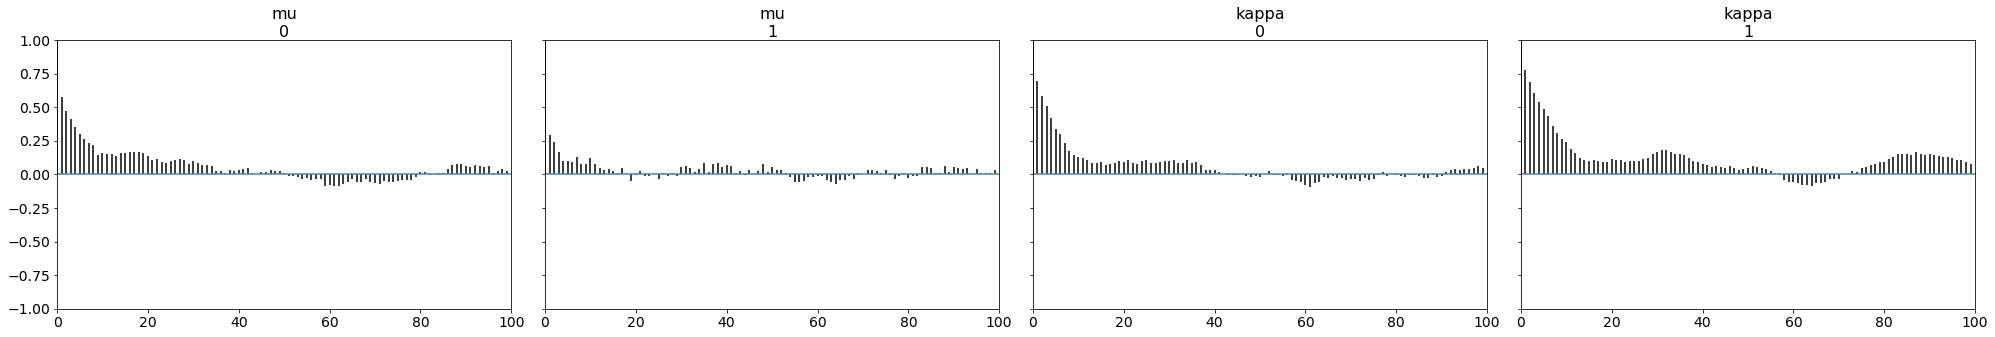

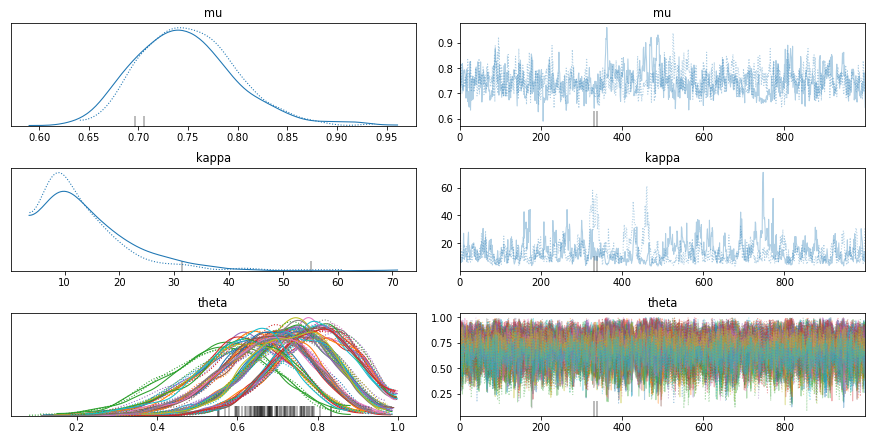

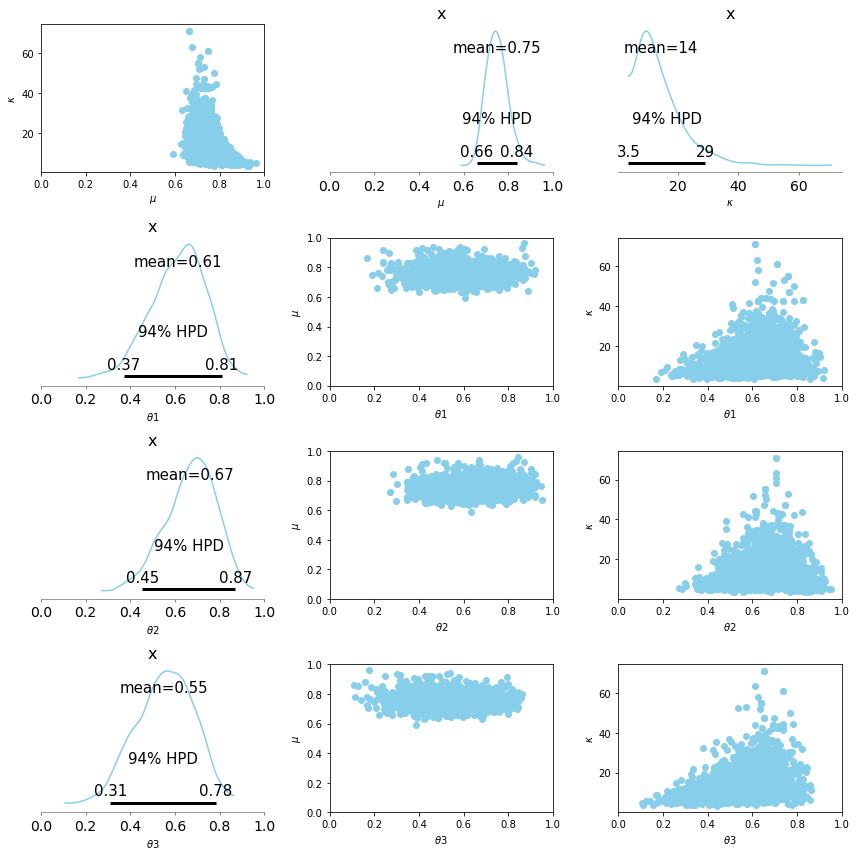

In [40]:
# Data for figure 9.11
#N =  [10, 10, 10]  # Number of flips per coin
#z =  [5, 5, 5]  # Number of heads per coin
## Data for figure 9.12
#N =  [10, 10, 10]  # Number of flips per coin
#z =  [1, 5, 9]  # Number of heads per coin

## Data for exercise 9.1
#ncoins = 50
#nflipspercoin = 5
#mu_act = .7
#kappa_act = 20
#theta_act = beta.rvs(mu_act*kappa_act+1, (1-mu_act)*kappa_act+1, size=ncoins)
#z = binom.rvs(n=nflipspercoin, p=theta_act, size=ncoins)
#N = [nflipspercoin] * ncoins


# Arrange the data into a more convenient way to feed the PyMC model.
coin = []  # list/vector index for each coins (from 0 to number of coins)
y = []  # list/vector with head (1) or tails (0) for each flip.
for i, flips in enumerate(N):
    heads = z[i]
    if  heads > flips:
        sys.exit("The number of heads can't be greater than the number of flips")
    else:
        y = y + [1] * heads + [0] * (flips-heads)
        coin = coin + [i] * flips


# Specify the model in PyMC
with pm.Model() as model:
# define the hyperparameters
    mu = pm.Beta('mu', 2, 2)
    kappa = pm.Gamma('kappa', alpha = s2, beta = r2)
    # define the prior
    theta = pm.Beta('theta', mu * (kappa - 2) + 1, (1 - mu) * (kappa - 2) + 1, shape=len(N))
    # define the likelihood
    y = pm.Bernoulli('y', p=theta[coin], observed=y)

#   Generate a MCMC chain

    trace = pm.sample(1000)
    
    
## Check the results.

## Print summary for each trace
#pm.df_summary(trace)
#pm.df_summary(trace)

## Check for mixing and autocorrelation
pm.autocorrplot(trace, varnames=['mu', 'kappa'])
#pm.autocorrplot(trace, varnames =[mu, kappa])

## Plot KDE and sampled values for each parameter.
pm.traceplot(trace)
#pm.traceplot(trace)

# Create arrays with the posterior sample
theta1_sample = trace['theta'][:,0]
theta2_sample = trace['theta'][:,1]
theta3_sample = trace['theta'][:,2]
mu_sample = trace['mu']
kappa_sample = trace['kappa']


# Scatter plot hyper-parameters
fig, ax = plt.subplots(4, 3, figsize=(12,12))
ax[0, 0].scatter(mu_sample, kappa_sample, marker='o', color='skyblue')
ax[0, 0].set_xlim(0,1)
ax[0, 0].set_xlabel(r'$\mu$')
ax[0, 0].set_ylabel(r'$\kappa$')

# Plot mu histogram
#plot_post(mu_sample, xlab=r'$\mu$', show_mode=False, labelsize=9, framealpha=0.5)

pm.plot_posterior(mu_sample, ax=ax[0, 1], color='skyblue')
ax[0, 1].set_xlabel(r'$\mu$')
ax[0, 1].set_xlim(0,1)

# Plot kappa histogram
#plot_post(kappa_sample, xlab=r'$\kappa$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(kappa_sample, ax=ax[0, 2], color='skyblue')
ax[0, 2].set_xlabel(r'$\kappa$')

# Plot theta 1

#plot_post(theta1_sample, xlab=r'$\theta1$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta1_sample, ax=ax[1, 0], color='skyblue')
ax[1, 0].set_xlabel(r'$\theta1$')
ax[1, 0].set_xlim(0,1)

# Scatter theta 1 vs mu
ax[1, 1].scatter(theta1_sample, mu_sample, marker='o', color='skyblue')
ax[1, 1].set_xlim(0,1)
ax[1, 1].set_ylim(0,1)
ax[1, 1].set_xlabel(r'$\theta1$')
ax[1, 1].set_ylabel(r'$\mu$')

# Scatter theta 1 vs kappa
ax[1, 2].scatter(theta1_sample, kappa_sample, marker='o', color='skyblue')
ax[1, 2].set_xlim(0,1)
ax[1, 2].set_xlabel(r'$\theta1$')
ax[1, 2].set_ylabel(r'$\kappa$')

# Plot theta 2
#plot_post(theta2_sample, xlab=r'$\theta2$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta2_sample, ax=ax[2, 0], color='skyblue')
ax[2, 0].set_xlabel(r'$\theta2$')
ax[2, 0].set_xlim(0,1)

# Scatter theta 2 vs mu
ax[2, 1].scatter(theta2_sample, mu_sample, marker='o', color='skyblue')
ax[2, 1].set_xlim(0,1)
ax[2, 1].set_ylim(0,1)
ax[2, 1].set_xlabel(r'$\theta2$')
ax[2, 1].set_ylabel(r'$\mu$')

# Scatter theta 2 vs kappa
ax[2, 2].scatter(theta2_sample, kappa_sample, marker='o', color='skyblue')
ax[2, 2].set_xlim(0,1)
ax[2, 2].set_xlabel(r'$\theta2$')
ax[2, 2].set_ylabel(r'$\kappa$')

# Plot theta 3

#plot_post(theta3_sample, xlab=r'$\theta3$', show_mode=False, labelsize=9, framealpha=0.5)
pm.plot_posterior(theta3_sample, ax=ax[3, 0], color='skyblue')
ax[3, 0].set_xlabel(r'$\theta3$')
ax[3, 0].set_xlim(0,1)

# Scatter theta 3 vs mu
ax[3, 1].scatter(theta3_sample, mu_sample, marker='o', color='skyblue')
ax[3, 1].set_xlim(0,1)
ax[3, 1].set_ylim(0,1)
ax[3, 1].set_xlabel(r'$\theta3$')
ax[3, 1].set_ylabel(r'$\mu$')

# Scatter theta 3 vs kappa
ax[3, 2].scatter(theta3_sample, kappa_sample, marker='o', color='skyblue')
ax[3, 2].set_xlim(0,1)
ax[3, 2].set_xlabel(r'$\theta3$')
ax[3, 2].set_ylabel(r'$\kappa$')

plt.tight_layout()
plt.savefig('Figure_9.11.png')
plt.show()

D)

The posterior distribution doesn't change by much but it is noticably better when using the gamma distribution based on the mode instead of the mean. This is likely due to the more restricted nature of the mode gamma distribution. The reason you can say that its better is because the autocorrelation plots clearly show less correlation when using the mode distribution and the 95% HDI for the mode distribution is more concentrated, at least when I ran the code the first time. Also the trace plots for the mode are more concentrated than the mean version.

E)

I think the mode prior is most appropriate for this situation because it doesn't change the posterior much but it does affect the spread, restricting the model to smaller values of kappa

# 9.2

A)

Using the figures in the book, the prior distribution on theta 1 using the mode has rounded ends because the gamma distribution, when using the mode to determine the shape and rate parameters, is much more concentrated on a single value and cuts off anything that is relatively higher or lower, causing the attenuation of the smaller and larger values. Where as the gamma distribution using the mean to determine the shape and rate parameters encompases a much larger range of values, not attenuating higher and lower values specifically, but more of a gradual attenuation. 

B)

I think that using the gamma distribution using the mode is the best choice as it doesn't hugely alter the posterior with respect to the mean gamma distribution while giving a more concentrated spread of possible values